In [77]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mered\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mered\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mered\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df = pd.read_csv('Twitter_Data.csv', encoding= 'unicode_escape')

In [18]:
df.head(9)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion


In [19]:
df.shape


(9093, 3)

In [20]:
df.drop(['emotion_in_tweet_is_directed_at'], axis=1, inplace= True)

In [21]:
df.dropna( inplace = True)

In [22]:
df.head(9)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion


In [23]:
df.rename(columns = {'tweet_text': 'tweet','is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace = True)

In [24]:
df.head()

,tweet,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [25]:
df.emotion.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [26]:
df.replace({'Negative emotion': 0, 'Positive emotion': 1}, inplace = True)

In [27]:
df.head()

,tweet,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,1
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1


In [28]:
df.emotion.value_counts()

No emotion toward brand or product    5388
1                                     2978
0                                      570
I can't tell                           156
Name: emotion, dtype: int64

In [29]:
df = df[df.emotion != "I can't tell"]

In [30]:
df = df[df.emotion != "No emotion toward brand or product"]

In [31]:
df.emotion.value_counts()

1    2978
0     570
Name: emotion, dtype: int64

In [33]:
data = df.tweet
target = df.emotion

In [40]:
import string
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``','@','#','\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob',"'re","n't"]

In [35]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [240]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed    

In [241]:
processed_data = list(map(process_article, data))

In [242]:
processed_data

[['wesley83',
  '3g',
  'iphone',
  '3',
  'hrs',
  'tweeting',
  'rise_austin',
  'dead',
  'need',
  'upgrade',
  'plugin',
  'stations',
  'sxsw'],
 ['jessedee',
  'know',
  'fludapp',
  'awesome',
  'ipad/iphone',
  'app',
  'likely',
  'appreciate',
  'design',
  'also',
  'giving',
  'free',
  'ts',
  'sxsw'],
 ['swonderlin', 'wait', 'ipad', '2', 'also', 'sale', 'sxsw'],
 ['sxsw',
  'hope',
  'year',
  'festival',
  'crashy',
  'year',
  'iphone',
  'app',
  'sxsw'],
 ['sxtxstate',
  'great',
  'stuff',
  'fri',
  'sxsw',
  'marissa',
  'mayer',
  'google',
  'tim',
  "o'reilly",
  'tech',
  'books/conferences',
  'amp',
  'matt',
  'mullenweg',
  'wordpress'],
 ['sxsw',
  'starting',
  'ctia',
  'around',
  'corner',
  'googleio',
  'hop',
  'skip',
  'jump',
  'good',
  'time',
  'android',
  'fan'],
 ['beautifully',
  'smart',
  'simple',
  'idea',
  'rt',
  'madebymany',
  'thenextweb',
  'wrote',
  'hollergram',
  'ipad',
  'app',
  'sxsw',
  'http'],
 ['counting',
  'days',

In [243]:
articles_concat = []
for article in processed_data:
    articles_concat += article

In [51]:
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.most_common(200)

[('sxsw', 3684),
 ('mention', 2507),
 ('link', 1319),
 ('ipad', 1190),
 ('rt', 1074),
 ('apple', 1044),
 ('google', 861),
 ('iphone', 684),
 ('quot', 639),
 ('store', 588),
 ('2', 554),
 ('app', 456),
 ('new', 402),
 ('austin', 318),
 ('amp', 233),
 ('android', 222),
 ('ipad2', 222),
 ('launch', 182),
 ('get', 181),
 ('one', 169),
 ('pop-up', 164),
 ('social', 155),
 ('like', 153),
 ('circles', 150),
 ('time', 146),
 ('line', 146),
 ('great', 145),
 ('party', 137),
 ('via', 134),
 ("'m", 132),
 ('today', 131),
 ('free', 127),
 ('cool', 124),
 ('day', 116),
 ('maps', 114),
 ('apps', 113),
 ('people', 110),
 ('mobile', 108),
 ('go', 108),
 ('sxswi', 107),
 ('good', 105),
 ('network', 103),
 ('got', 99),
 ('love', 98),
 ('awesome', 96),
 ('temporary', 94),
 ('opening', 91),
 ('downtown', 89),
 ('w/', 88),
 ('see', 86),
 ('need', 85),
 ('check', 81),
 ('going', 80),
 ('thanks', 80),
 ('even', 80),
 ('popup', 78),
 ('called', 77),
 ('mayer', 76),
 ('first', 75),
 ('open', 74),
 ('major', 73

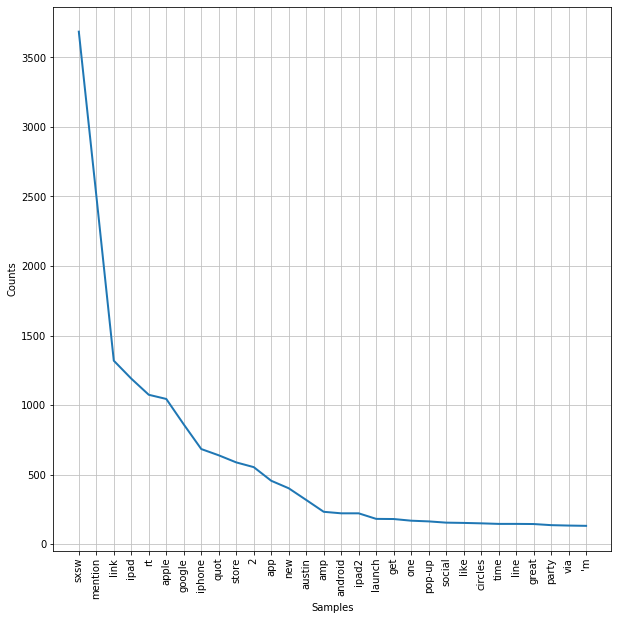

In [52]:
plt.figure(figsize=(10,10))
articles_freqdist.plot(30)

In [53]:
processed_data[1]

['jessedee',
 'know',
 'fludapp',
 'awesome',
 'ipad/iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 'giving',
 'free',
 'ts',
 'sxsw']

In [244]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [430]:
Data = {'tweet':lemmatized_output, 'emotion':target}
df3 = pd.DataFrame(Data)

In [431]:
df3.head()

,tweet,emotion
0,wesley83 3g iphone 3 hr tweeting rise_austin d...,0
1,jessedee know fludapp awesome ipad/iphone app ...,1
2,swonderlin wait ipad 2 also sale sxsw,1
3,sxsw hope year festival crashy year iphone app...,0
4,sxtxstate great stuff fri sxsw marissa mayer g...,1


In [437]:
df3.to_csv = (r'projects\NLP_Project\Cleaned_data.csv')

In [245]:
X = lemmatized_output
y = target

In [246]:
y.value_counts()

1    2978
0     570
Name: emotion, dtype: int64

In [62]:
df_freq_neg = df[df['emotion']==0]
df_freq_pos = df[df['emotion']==1]

In [63]:
data_neg = df_freq_neg['tweet']
data_pos = df_freq_pos['tweet']

In [64]:
pros_neg = list(map(process_article, data_neg))
pros_pos = list(map(process_article, data_pos))

In [65]:
total_vocab_neg = set()
for comment in pros_neg:
    total_vocab_neg.update(comment)
len(total_vocab_neg)

2126

In [66]:
total_vocab_pos = set()
for comment in pros_pos:
    total_vocab_pos.update(comment)
len(total_vocab_pos)

5398

In [67]:
flat_neg = [item for sublist in pros_neg for item in sublist]
flat_pos = [item for sublist in pros_pos for item in sublist]

In [68]:
neg_freq = FreqDist(flat_neg)
pos_freq = FreqDist(flat_pos)

In [69]:
neg_freq.most_common(20)

[('sxsw', 581),
 ('mention', 313),
 ('ipad', 188),
 ('quot', 175),
 ('iphone', 161),
 ('google', 145),
 ('rt', 137),
 ('apple', 120),
 ('link', 102),
 ('2', 64),
 ('app', 60),
 ('store', 46),
 ('new', 43),
 ('like', 39),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('people', 29),
 ('design', 28),
 ('need', 25)]

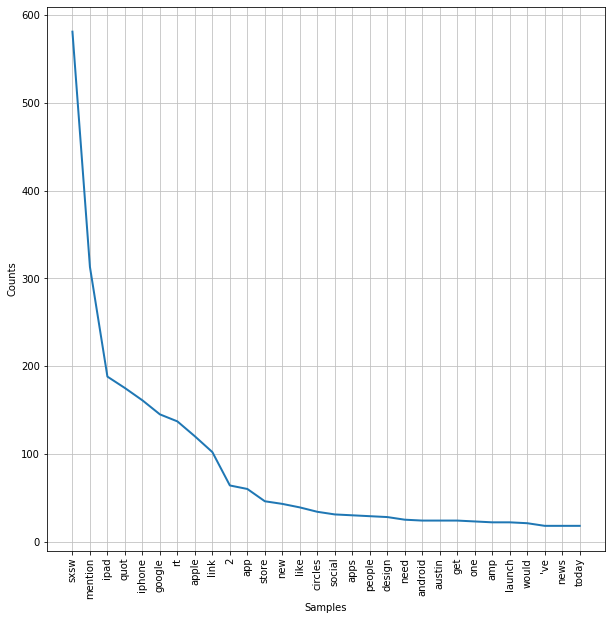

In [70]:
plt.figure(figsize=(10,10))
neg_freq.plot(30)

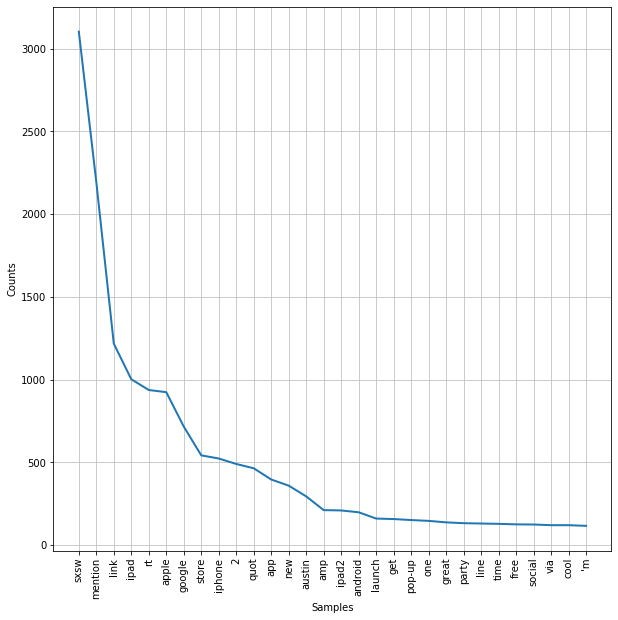

In [71]:
plt.figure(figsize=(10,10))
pos_freq.plot(30)

In [72]:
pos_total_word_count = sum(pos_freq.values())
pos_top_25 = pos_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in pos_top_25:
    normalized_frequency = word[1]/pos_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

sxsw 		 0.08297
mention 		 0.05866
link 		 0.03254
ipad 		 0.02679
rt 		 0.02505
apple 		 0.02471
google 		 0.01914
store 		 0.01449
iphone 		 0.01398
2 		 0.0131
quot 		 0.01241
app 		 0.01059
new 		 0.009599
austin 		 0.007861
amp 		 0.005642
ipad2 		 0.005588
android 		 0.005294
launch 		 0.004278
get 		 0.004198
pop-up 		 0.004038
one 		 0.003904
great 		 0.003663
party 		 0.00353
line 		 0.003476
time 		 0.003423


In [73]:
neg_total_word_count = sum(neg_freq.values())
neg_top_25 = neg_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in neg_top_25:
    normalized_frequency = word[1]/neg_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

sxsw 		 0.08151
mention 		 0.04391
ipad 		 0.02637
quot 		 0.02455
iphone 		 0.02259
google 		 0.02034
rt 		 0.01922
apple 		 0.01684
link 		 0.01431
2 		 0.008979
app 		 0.008418
store 		 0.006453
new 		 0.006033
like 		 0.005471
circles 		 0.00477
social 		 0.004349
apps 		 0.004209
people 		 0.004068
design 		 0.003928
need 		 0.003507
android 		 0.003367
austin 		 0.003367
get 		 0.003367
one 		 0.003227
amp 		 0.003086


In [204]:
pos_bar_counts = [x[1] for x in pos_freq.most_common(25)]
pos_bar_words = [x[0] for x in pos_freq.most_common(25)]

neg_bar_counts = [x[1] for x in neg_freq.most_common(25)]
neg_bar_words = [x[0] for x in neg_freq.most_common(25)]

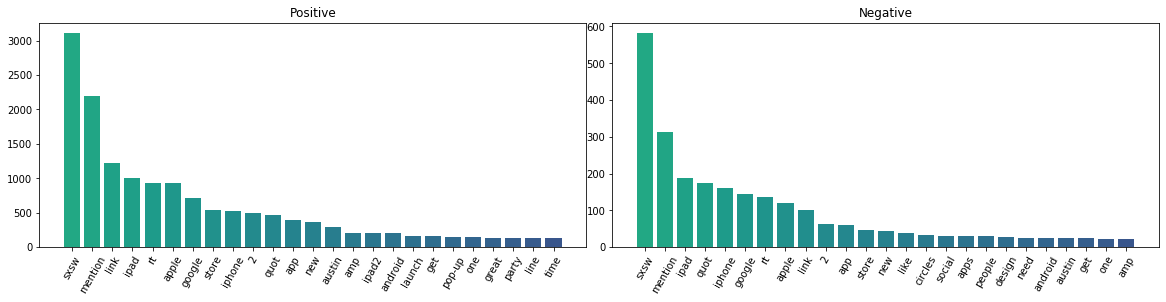

In [205]:
color = cm.viridis_r(np.linspace(.4,.8, 30))
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(pos_bar_words, pos_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(neg_bar_words, neg_bar_counts, color=color )

ax.title.set_text('Positive')
ax2.title.set_text('Negative')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

In [208]:
 #!pip install wordcloud
from wordcloud import WordCloud
pos_dictionary = dict(zip(pos_bar_words, pos_bar_counts))
neg_dictionary = dict(zip(neg_bar_words, neg_bar_counts))

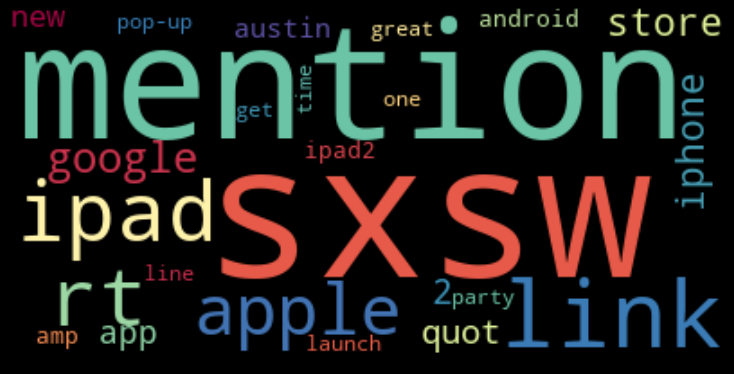

In [209]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(pos_dictionary)


plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)



plt.show()

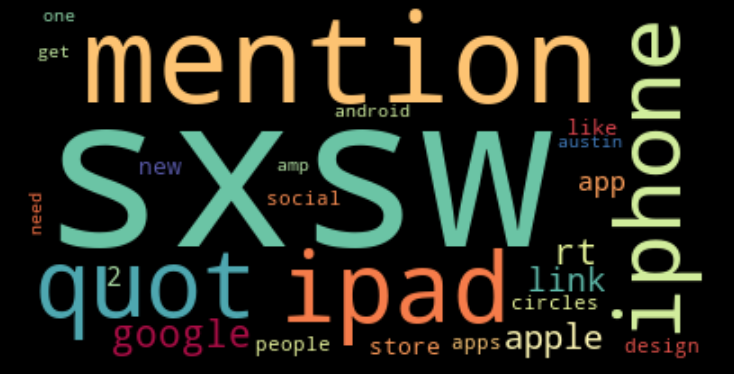

In [210]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neg_dictionary)


plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)


plt.show()

In [74]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [82]:
article_finder = BigramCollocationFinder.from_words(articles_concat)

In [83]:
article_scored = article_finder.score_ngrams(bigram_measures.raw_freq)

In [84]:
article_scored[:50]

[(('rt', 'mention'), 0.0234689065061648),
 (('ipad', '2'), 0.010577851640577627),
 (('sxsw', 'link'), 0.00745615020100164),
 (('mention', 'sxsw'), 0.005861612055606711),
 (('sxsw', 'rt'), 0.0056594875019651),
 (('apple', 'store'), 0.005412446380847575),
 (('link', 'sxsw'), 0.004873447571136614),
 (('mention', 'mention'), 0.004064949356570171),
 (('sxsw', 'mention'), 0.003952657937880387),
 (('link', 'rt'), 0.003525950546859209),
 (('iphone', 'app'), 0.003503492263121252),
 (('sxsw', 'apple'), 0.003099243155838031),
 (('mention', 'google'), 0.00289711860219642),
 (('store', 'sxsw'), 0.00282974375098255),
 (('mention', 'apple'), 0.002447952927437285),
 (('via', 'mention'), 0.002447952927437285),
 (('austin', 'sxsw'), 0.0024254946436993285),
 (('sxsw', 'ipad'), 0.002380578076223415),
 (('mention', 'rt'), 0.0023132032250095446),
 (('social', 'network'), 0.0022009118063197612),
 (('pop-up', 'store'), 0.0021559952388438474),
 (('new', 'social'), 0.0020886203876299774),
 (('google', 'maps'), 

In [417]:
article_pmi_finder = BigramCollocationFinder.from_words(articles_concat)

In [418]:
article_pmi_finder.apply_freq_filter(1)

In [419]:
article_pmi_scored = article_pmi_finder.score_ngrams(bigram_measures.pmi)

In [420]:
article_pmi_scored

[(("'after", '8pm'), 15.442392793240856),
 (("'dont", 'evil'), 15.442392793240856),
 (("'freak", 'jet'), 15.442392793240856),
 (("'get", 'talib'), 15.442392793240856),
 (("'matt", 'fricking'), 15.442392793240856),
 (("'wait", '2012/3/4/5/'), 15.442392793240856),
 (("'where", 'exceptionally'), 15.442392793240856),
 (('*does*', 'glowing'), 15.442392793240856),
 (('*force', 'chokes'), 15.442392793240856),
 (('*new*', 'www.divasanddorks.com'), 15.442392793240856),
 (('*slips', 'bag*'), 15.442392793240856),
 (('*spark', 'selected'), 15.442392793240856),
 (('*strums', 'guitar*'), 15.442392793240856),
 (('-approach', 'skepticism'), 15.442392793240856),
 (('-but', 'jaloux'), 15.442392793240856),
 (('-maybe', 'wk'), 15.442392793240856),
 (('..lame', 'z'), 15.442392793240856),
 (('.02', 'symbian'), 15.442392793240856),
 (('//itunes.apple.com/us/app/holler-gram/id420666439', 'mt=8'),
  15.442392793240856),
 (('1.6', 'gigs'), 15.442392793240856),
 (('1/4', 'million+'), 15.442392793240856),
 (('100

In [348]:

good = np.percentile([s[1] for s in article_pmi_scored], 80)
print(good)
pmi_top80 = [s for s in article_pmi_scored if s[1]>= good]
print(len(pmi_top80))


10.792790294301064
479


In [379]:
X1 = [' '.join(s[0]) for s in pmi_top80]
y1 = target[:479]

In [380]:
X1

['1,000+100s',
 '100s10pm',
 '15slidesq7a',
 '22\x89û_plied',
 '35business',
 '64gbsxsw-ers',
 '80scale',
 '80stotal',
 '90040',
 '9:30every',
 'alivehavnt',
 'alwayseverywhere',
 'asddieulol',
 'attendingconcertgoers',
 'attentionsweets',
 'attitudesera',
 'avoidvoxpop',
 'badgecustome',
 'bandeasier',
 'bankinnovationblack',
 'bcfunny/sad',
 'behindfashion',
 'berndcompete',
 'bloggingwrite',
 'bonusfield',
 'boughtheadsets',
 'bpmcelebrate',
 'brainswins',
 'bringloving',
 'brobeta',
 'brokenconsequences',
 'buildingconnect',
 'businesscreating',
 'buyscertificate',
 'buzzingpoole',
 'calendarmacallan',
 'calltwo-factor',
 'calleddriving',
 'can\x89ûªtcertain',
 'captaintakin',
 'casediscussion',
 'celebratelabs',
 'centerconvinced',
 'chargedmind',
 'checkinggave',
 'chevytweethousedelivery',
 'circlefoot',
 'cnngrillwsj',
 'cockywin-win',
 'coinsidenceinstagram',
 'combineexpensive',
 'communications\x89ûªantwoord',
 'competitionimpressions',
 'consequencesears',
 'constantgeeks',

In [395]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer()

tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

tfidf_data_train

<2838x4949 sparse matrix of type '<class 'numpy.float64'>'
	with 33337 stored elements in Compressed Sparse Row format>

In [396]:
y_train = y_train.astype('int')

In [103]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

rf_classifier.fit(tfidf_data_train, y_train)

rf_test_preds= rf_classifier.predict(tfidf_data_test)

In [104]:
tfidf_data_train

<2838x4949 sparse matrix of type '<class 'numpy.float64'>'
	with 33337 stored elements in Compressed Sparse Row format>

In [257]:
def evaluator(X_train, y_train, X_test, y_test, df, target, model):
    start = time.time()
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    end = time.time()
    print("Model Time: {}".format(end-start))
    class_report = classification_report(y_test, test_preds)
    print("Precision Score: {}".format(precision_score(y_test, test_preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(y_test, test_preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(y_test, test_preds )))
    print("F1 Score: {}".format(f1_score(y_test, test_preds, average = 'macro')))
    
    print('Mean Absolute Error:', mean_absolute_error(y_test, test_preds))  
    print('Mean Squared Error:', mean_squared_error(y_test, test_preds))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_preds)))
    
    #print('Mean Model Cross-Val Score (k=3):')
    #print(cross_val_score(model, df, target, cv=3).mean())
    
    model_confusion_matrix = plot_confusion_matrix(model, X_test, y_test)
    return model_confusion_matrix, class_report

In [397]:
y_test = y_test.astype('int')

Model Time: 0.6801800727844238
Precision Score: 0.8884671532846715
Recall Score: 0.5933435294447796
Accuracy Score: 0.8591549295774648
F1 Score: 0.6182877787574461
Mean Absolute Error: 0.14084507042253522
Mean Squared Error: 0.14084507042253522
Root Mean Squared Error: 0.37529331252040077


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x21bd3f5f630>,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.19      0.32       121\n           1       0.86      1.00      0.92       589\n\n    accuracy                           0.86       710\n   macro avg       0.89      0.59      0.62       710\nweighted avg       0.87      0.86      0.82       710\n')

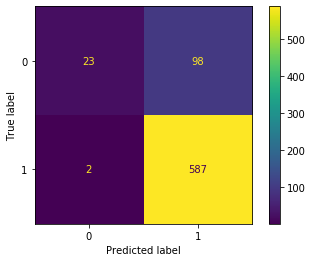

In [107]:
evaluator(tfidf_data_train, y_train, tfidf_data_test, y_test, df, y, rf_classifier)

In [381]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.20, random_state=1)



In [386]:
y_train2=y_train2.astype('int')
y_test2=y_test2.astype('int')

In [387]:
X_train2

['earsfair',
 'teecalendar',
 'planetbank',
 'pilhoferactsofsharing.com',
 'meetingshawk',
 'gsdmguard',
 'unveilscenter',
 'sellingchevytweethouse',
 'interestedsoo',
 'bandeasier',
 'casediscussion',
 'unscientificalive',
 'happynpr',
 'versionpersonalcloud',
 'classiestconstant',
 '~5:30wish',
 'iphonesheart',
 'looksstupid',
 'wishsay',
 'formertemp',
 'easierexcuse',
 'circlefoot',
 'installinginstalls',
 'turkeyliking',
 'failedouch',
 'enlighteningsales',
 'interactiveradical',
 'eddyutter',
 'celebratelabs',
 'alarmsladies',
 'francocashmore',
 'personalcloudfoursquare',
 'thereforerepressed',
 'scenetaxi',
 'nailedbluetooth',
 'triedtries',
 'citesgoogle/bing',
 'fwdright',
 'sessionsios',
 'crowleyknows',
 'probsxprotect',
 'possiblyfoosspotting',
 'favfell',
 'headsetshipsters',
 'bloggingwrite',
 'attendingconcertgoers',
 'darn35',
 'admitslittle',
 'captaintakin',
 'envysony',
 'secondgame',
 'enjoyinglaurieshook',
 'mashablek',
 'fingerprintbldg',
 'things7',
 'weekendswe

In [388]:
pipelineX = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('smt', SMOTE()),
                    ('RF', RandomForestClassifier())])


Model Time: 0.14764046669006348
Precision Score: 0.4270833333333333
Recall Score: 0.5
Accuracy Score: 0.8541666666666666
F1 Score: 0.4606741573033708
Mean Absolute Error: 0.14583333333333334
Mean Squared Error: 0.14583333333333334
Root Mean Squared Error: 0.3818813079129867


C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x21bd2eeb2b0>,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        14\n           1       0.85      1.00      0.92        82\n\n    accuracy                           0.85        96\n   macro avg       0.43      0.50      0.46        96\nweighted avg       0.73      0.85      0.79        96\n')

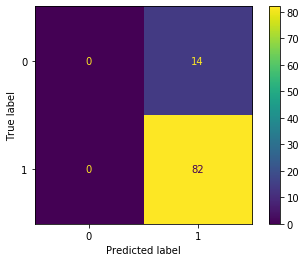

In [389]:
evaluator(X_train2, y_train2, X_test2, y_test2, df, y, pipelineX)

In [285]:
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
pipeline = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('smt', SMOTE()),
                    ('RF', RandomForestClassifier())])


In [286]:
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5],
        'tfidf__max_df': np.linspace(0.1, 1, 10),
        'tfidf__binary': [True, False],
      'tfidf__norm': [None, 'l1', 'l2']}]

In [287]:
gridsearch = GridSearchCV(estimator=pipeline, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

Model Time: 1623.579972743988
Precision Score: 0.9159604519774012
Recall Score: 0.5082644628099173
Accuracy Score: 0.8323943661971831
F1 Score: 0.47038506622537307
Mean Absolute Error: 0.1676056338028169
Mean Squared Error: 0.1676056338028169
Root Mean Squared Error: 0.4093966704833063


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x21bd60b8f28>,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.02      0.03       121\n           1       0.83      1.00      0.91       589\n\n    accuracy                           0.83       710\n   macro avg       0.92      0.51      0.47       710\nweighted avg       0.86      0.83      0.76       710\n')

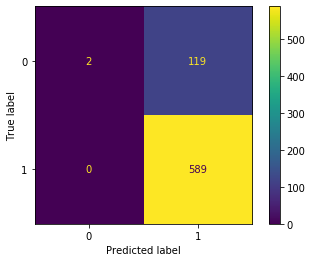

In [288]:
evaluator(X_train, y_train, X_test, y_test, df, y, gridsearch)

In [289]:
gridsearch.best_params_

{'RF__max_depth': 6,
 'RF__min_samples_leaf': 3,
 'RF__min_samples_split': 5,
 'tfidf__binary': True,
 'tfidf__max_df': 0.9,
 'tfidf__norm': 'l1'}

In [262]:
pipeline2 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('smt', SMOTE()),
                    ('NB', MultinomialNB())])

In [263]:
grid = {'NB__alpha': np.linspace(0.5, 1.5, 6),
  'NB__fit_prior': [True, False],
  'tfidf__max_df': np.linspace(0.1, 1, 10),
  'tfidf__binary': [True, False],
  'tfidf__norm': [None, 'l1', 'l2']}

In [264]:
gridsearch2 = GridSearchCV(estimator=pipeline2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

Model Time: 162.21680665016174
Precision Score: 0.7318512715927662
Recall Score: 0.7408691015729139
Accuracy Score: 0.847887323943662
F1 Score: 0.7361829791918969
Mean Absolute Error: 0.15211267605633802
Mean Squared Error: 0.15211267605633802
Root Mean Squared Error: 0.39001625101569554


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x21bd78ea4e0>,
 '              precision    recall  f1-score   support\n\n           0       0.55      0.58      0.56       121\n           1       0.91      0.90      0.91       589\n\n    accuracy                           0.85       710\n   macro avg       0.73      0.74      0.74       710\nweighted avg       0.85      0.85      0.85       710\n')

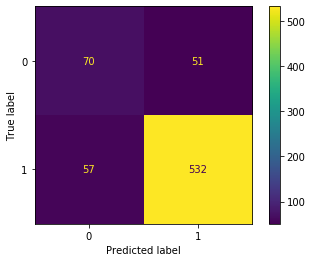

In [265]:
evaluator(X_train, y_train, X_test, y_test, df, y, gridsearch2)

In [266]:
gridsearch2.best_params_

{'NB__alpha': 1.3,
 'NB__fit_prior': True,
 'tfidf__binary': False,
 'tfidf__max_df': 0.5,
 'tfidf__norm': None}

In [180]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,25))
    plt.barh(range(n_features), model.feature_importances_) 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

In [194]:
FinalRF = Pipeline([
                    ('tfidf', TfidfVectorizer(binary = False,
                     max_df =0.9,
                     norm = None)),
                    ('smt', SMOTE()),
                    ('RF', RandomForestClassifier(
                        max_depth = 6,
                        min_samples_leaf = 3,
                        min_samples_split =5))])


In [398]:
pipeline3 = Pipeline([
                    ('tfidf', TfidfVectorizer(ngram_range=(2,2))),
                    ('smt', SMOTE()),
                    ('RF', RandomForestClassifier())])

In [399]:
grid3 = {'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5],
        'tfidf__max_df': np.linspace(0.1, 1, 10),
          'tfidf__binary': [True, False],
          'tfidf__norm': [None, 'l1', 'l2']}

In [400]:
len(X_train)

2838

In [404]:
gridsearch3 = GridSearchCV(estimator=pipeline3, 
                          param_grid=grid3, 
                          scoring='accuracy', 
                          cv=5)

Model Time: 1766.9987998008728
Precision Score: 0.9183238636363636
Recall Score: 0.5247933884297521
Accuracy Score: 0.8380281690140845
F1 Score: 0.5027738702035796
Mean Absolute Error: 0.1619718309859155
Mean Squared Error: 0.1619718309859155
Root Mean Squared Error: 0.4024572411895648


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x21bd89bf6d8>,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.05      0.09       121\n           1       0.84      1.00      0.91       589\n\n    accuracy                           0.84       710\n   macro avg       0.92      0.52      0.50       710\nweighted avg       0.86      0.84      0.77       710\n')

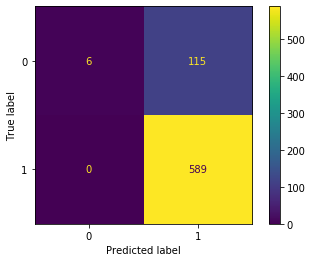

In [405]:
evaluator(X_train, y_train, X_test, y_test, df, y, gridsearch3)

In [406]:
gridsearch3.best_params_

{'RF__max_depth': 6,
 'RF__min_samples_leaf': 1,
 'RF__min_samples_split': 2,
 'tfidf__binary': True,
 'tfidf__max_df': 0.4,
 'tfidf__norm': 'l2'}

In [407]:
pipeline4 = Pipeline([
                    ('tfidf', TfidfVectorizer(ngram_range=(2,2))),
                    ('smt', SMOTE()),
                    ('DT', DecisionTreeClassifier())])

In [408]:
grid4 = {'DT__criterion': ['gini', 'entropy'],
    'DT__max_depth': [None, 5, 10, 15,],
    'DT__min_samples_split': [2, 5, 10],
    'DT__min_samples_leaf': [2,5,10],
      'tfidf__max_df': np.linspace(0.1, 1, 10),
          'tfidf__binary': [True, False],
          'tfidf__norm': [None, 'l1', 'l2'],}

In [409]:
gridsearch4 = GridSearchCV(estimator=pipeline4, 
                          param_grid=grid4, 
                          scoring='accuracy', 
                          cv=5)

In [410]:
evaluator(X_train, y_train, X_test, y_test, df, y, gridsearch4)

KeyboardInterrupt: 

In [212]:
plot_feature_importances(FinalRF.named_steps['RF'])

AttributeError: 'list' object has no attribute 'shape'

In [203]:
FinalRF.named_steps['RF'].feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [197]:
FinalRF.fit(X_train, y_train)
FinalRF.named_steps['RF'].feature_importances_
plot_feature_importances(FinalRF)

AttributeError: 'list' object has no attribute 'shape'

In [202]:
plt.barh(X_train.feature_names,FinalRF.named_steps['RF'].feature_importances_ )

AttributeError: 'list' object has no attribute 'feature_names'

In [223]:
#!pip install pyLDAvis
import gensim

from nltk.corpus import stopwords
import gensim.corpora as corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [230]:
id2word = corpora.Dictionary(processed_data)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in processed_data]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [231]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.156012  0.0       1        1  52.638194
1     -0.156012  0.0       2        1  47.361806, topic_info=       Term         Freq        Total Category  logprob  loglift
27     ipad  1175.000000  1175.000000  Default  30.0000  30.0000
72    apple   770.000000   770.000000  Default  29.0000  29.0000
4    iphone   701.000000   701.000000  Default  28.0000  28.0000
26        2   576.000000   576.000000  Default  27.0000  27.0000
38   google   664.000000   664.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
436  launch   125.949299   173.452301   Topic2  -5.1206   0.4273
67       rt   166.789304   325.701231   Topic2  -4.8398   0.0781
258     get   103.739240   155.470827   Topic2  -5.3146   0.3428
240    quot   143.410981   366.291784   Topic2  -4.9908  -0.1904
489     day   107.068437   213.244473   Topic2  -5.2830   0.0584

[124 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
159       1  0.798470    'm
159       2  0.203384    'm
344       1  0.015929   've
344       2  0.987572   've
26        1  0.001736     2
...     ...       ...   ...
448       2  0.976345  want
1031      1  0.974423   way
1031      2  0.019685   way
201       1  0.013316   win
201       2  0.985412   win

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])